# Fitness Tracker Data Analysis for Health and Activity Insights

## Project Briefing

This project analyzes a dataset collected from fitness tracker users, focusing on daily physical activity metrics such as steps taken, active minutes, distances covered, and calories burned. The goal is to uncover patterns in user behavior, identify trends in physical activity, and understand correlations between different activity measures. The insights will help inform strategies for promoting healthier lifestyles and optimizing fitness tracker features for users interested in improving their wellness.

---

## Project Goals

1. **Explore and clean the dataset** to ensure data quality and proper formatting for analysis.  
2. **Summarize key statistics** about user activity, including steps, distances, active minutes, and calories burned.  
3. **Visualize activity trends** over time to identify daily or weekly patterns across users.  
4. **Analyze relationships** between different activity metrics to understand how they influence each other.  
5. **Segment users by activity levels** to profile different types of users and their behavior patterns.  
6. **Generate actionable insights** that can help promote better health and fitness outcomes.  
7. **Create a clear, visual report** that presents findings in an accessible way for both technical and non-technical audiences.

## 1. Project Setup

- Import necessary libraries (`pandas`, `matplotlib`, `seaborn`, etc.)
- Load the dataset and inspect basic info (e.g., shape, column names, missing values)
- Convert data types as needed (e.g., convert `Date` column to datetime format)

In [13]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Activity.csv')

# Preview the first rows
df.head()


,UserID,Date,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
0,6117666160,4/20/2016,8.02,8.02,0.0,2.03,0.48,5.52,0.0,26,10,349,587,10449,2536
1,1644430081,4/13/2016,5.82,5.82,0.0,2.28,0.90,2.64,0.0,30,16,135,1259,8001,2902
2,1927972279,4/25/2016,0.11,0.11,0.0,0.00,0.00,0.11,0.0,0,0,12,1303,152,2100
3,6117666160,4/26/2016,7.21,7.21,0.0,0.00,0.34,6.87,0.0,0,7,352,1077,9543,2450
4,4388161847,5/9/2016,7.86,7.86,0.0,0.34,0.73,6.79,0.0,6,19,258,1020,10218,3013


In [14]:
# Shape of the dataset (rows, columns)
print("Shape:", df.shape)

# Column names
print("\nColumn names:")
print(df.columns)

# Data types and missing values
print("\nData types and missing values:")
print(df.info())

Shape: (940, 15)

Column names:
Index(['UserID', 'Date', 'Total_Distance', 'Tracker_Distance',
       'Logged_Activities_Distance', 'Very_Active_Distance',
       'Moderately_Active_Distance', 'Light_Active_Distance',
       'Sedentary_Active_Distance', 'Very_Active_Minutes',
       'Fairly_Active_Minutes', 'Lightly_Active_Minutes', 'Sedentary_Minutes',
       'Steps', 'Calories_Burned'],
      dtype='object')

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UserID                      940 non-null    int64  
 1   Date                        940 non-null    object 
 2   Total_Distance              940 non-null    float64
 3   Tracker_Distance            940 non-null    float64
 4   Logged_Activities_Distance  940 non-null    float64
 5   Very_Active_Distance        940 non-null    f

In [15]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check data types again
df.dtypes

UserID                                 int64
Date                          datetime64[ns]
Total_Distance                       float64
Tracker_Distance                     float64
Logged_Activities_Distance           float64
Very_Active_Distance                 float64
Moderately_Active_Distance           float64
Light_Active_Distance                float64
Sedentary_Active_Distance            float64
Very_Active_Minutes                    int64
Fairly_Active_Minutes                  int64
Lightly_Active_Minutes                 int64
Sedentary_Minutes                      int64
Steps                                  int64
Calories_Burned                        int64
dtype: object

2. Data Exploration & Summary

- Generate descriptive statistics (mean, min, max, std)
- Visualize distributions of key variables (steps, calories, active minutes)
- Identify any missing or outlier data points

In [16]:
# Summary statistics
df.describe()

,UserID,Date,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276416,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,7637.910638,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,3789.750000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,7405.500000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,10727.000000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,36019.000000,4900.000000
std,2.424805e+09,NaN,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,5087.150742,718.166862


### Comments

- Many users are **not consistently active**, with high sedentary time and frequent zero-activity days.
- There's a **small but distinct group of highly active users** pulling the averages up.
- The dataset is rich and offers opportunities to segment users, analyze behavior patterns, and potentially recommend improvements or goals for physical activity.

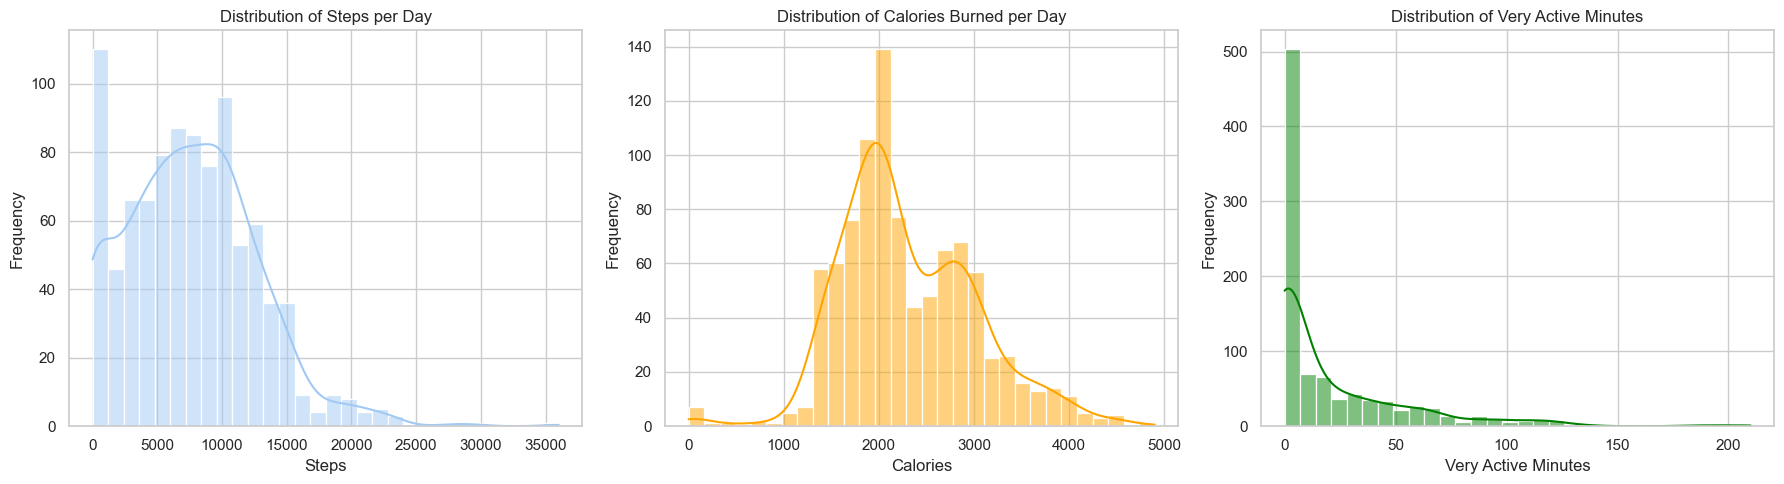

In [17]:
# Set plot style
sns.set(style="whitegrid", palette="pastel")

# Plot histograms for Steps, Calories Burned, and Very Active Minutes
plt.figure(figsize=(18, 5))

# Steps
plt.subplot(1, 3, 1)
sns.histplot(df['Steps'], bins=30, kde=True)
plt.title('Distribution of Steps per Day')
plt.xlabel('Steps')
plt.ylabel('Frequency')

# Calories
plt.subplot(1, 3, 2)
sns.histplot(df['Calories_Burned'], bins=30, kde=True, color='orange')
plt.title('Distribution of Calories Burned per Day')
plt.xlabel('Calories')
plt.ylabel('Frequency')

# Very Active Minutes
plt.subplot(1, 3, 3)
sns.histplot(df['Very_Active_Minutes'], bins=30, kde=True, color='green')
plt.title('Distribution of Very Active Minutes')
plt.xlabel('Very Active Minutes')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Distribution of Key Variables

We visualized the distribution of three main activity metrics: 

- **Steps per day**
- **Calories burned**
- **Very active minutes**

### Key Observations:
- **Steps**: The majority of users fall below the recommended 10,000 steps per day, though a small portion are highly active.
- **Calories**: Most users burn between 1,800 and 2,800 calories daily. A few outliers burn more than 4,000.
- **Very Active Minutes**: A significant number of users report 0–30 very active minutes per day, indicating low engagement in high-intensity activities.

These insights highlight the variation in user activity and suggest opportunities for deeper segmentation or personalized goal setting.


In [18]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Check outliers for a few key columns
outlier_cols = ['Steps', 'Calories_Burned', 'Very_Active_Minutes']

for col in outlier_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")


Missing values per column:
Series([], dtype: int64)
Steps: 12 outliers
Calories_Burned: 16 outliers
Very_Active_Minutes: 65 outliers


They could represent:

- Highly active users with intense workout days 

- Data input errors (like 36,000+ steps in one day )

- Edge behavior — which could still be valid and interesting

To decide what to do, Let's generate some boxplots

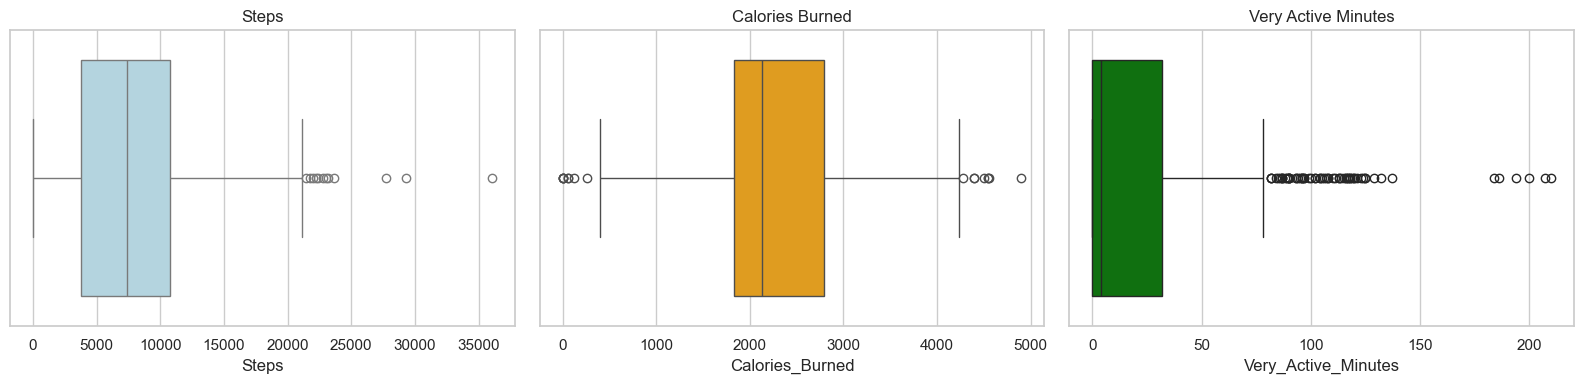

In [19]:
plt.figure(figsize=(16, 4))

# Steps
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Steps'], color='lightblue')
plt.title('Steps')

# Calories
plt.subplot(1, 3, 2)
sns.boxplot(x=df['Calories_Burned'], color='orange')
plt.title('Calories Burned')

# Very Active Minutes
plt.subplot(1, 3, 3)
sns.boxplot(x=df['Very_Active_Minutes'], color='green')
plt.title('Very Active Minutes')

plt.tight_layout()
plt.show()

The box plots indicate that the individual or group being tracked generally maintains a moderate level of daily activity in terms of steps and calories burned, with a central tendency around 7,500 steps and 2,000-2,200 calories. However, "Very Active Minutes" are typically low, suggesting that sustained high-intensity activity is less frequent, but when it does occur, it can be quite significant (as shown by the numerous high outliers).

DECISION

Keeping these intense users are interesting! Removing them would erase potentially useful insights — like how high-intensity days affect calories burned, for example.

3. Activity Patterns Analysis

- Analyze daily steps and active minutes trends
- Compare activity levels across users
- Explore correlations between steps, active minutes, and calories burned

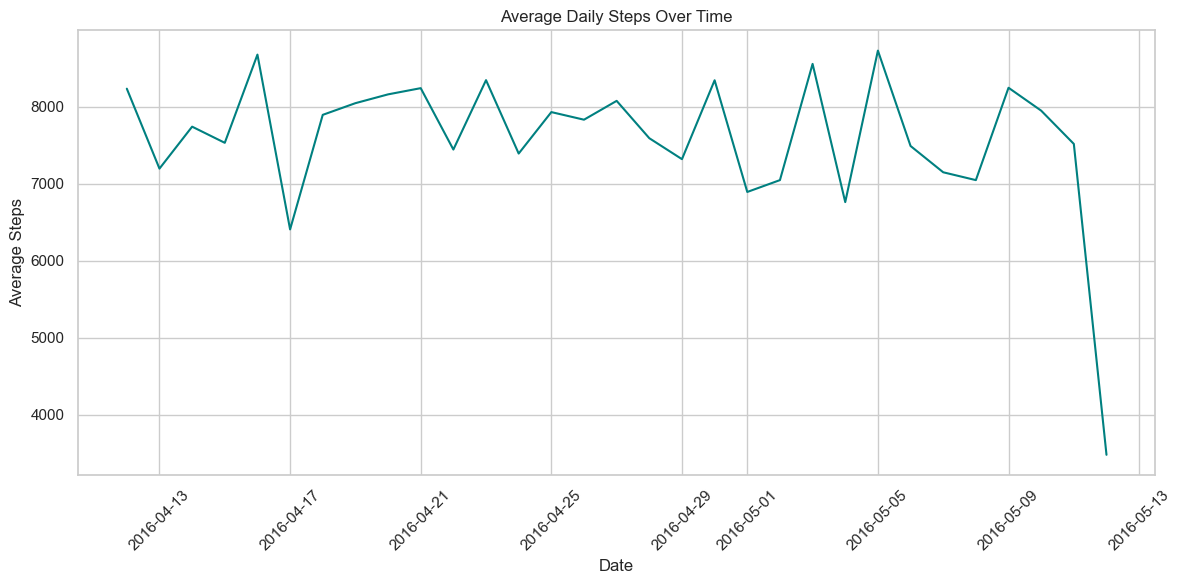

In [21]:
# Group by date to compute average steps and active minutes per day
daily_summary = df.groupby('Date').agg({
    'Steps': 'mean',
    'Very_Active_Minutes': 'mean',
    'Fairly_Active_Minutes': 'mean',
    'Lightly_Active_Minutes': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_summary, x='Date', y='Steps', color='teal')
plt.title('Average Daily Steps Over Time')
plt.ylabel('Average Steps')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plot reveals that the average daily steps were generally healthy, often exceeding 7,000 steps, for most of the observed month. However, there were clear variations in activity, with some days showing lower step counts. Critically, there was a dramatic and sharp drop in average daily steps at the very end of the period, suggesting a sudden change in activity levels for the individual or group being tracked. This could be due to various reasons, such as illness, a holiday, a change in routine, or a sensor issue if it's device data.

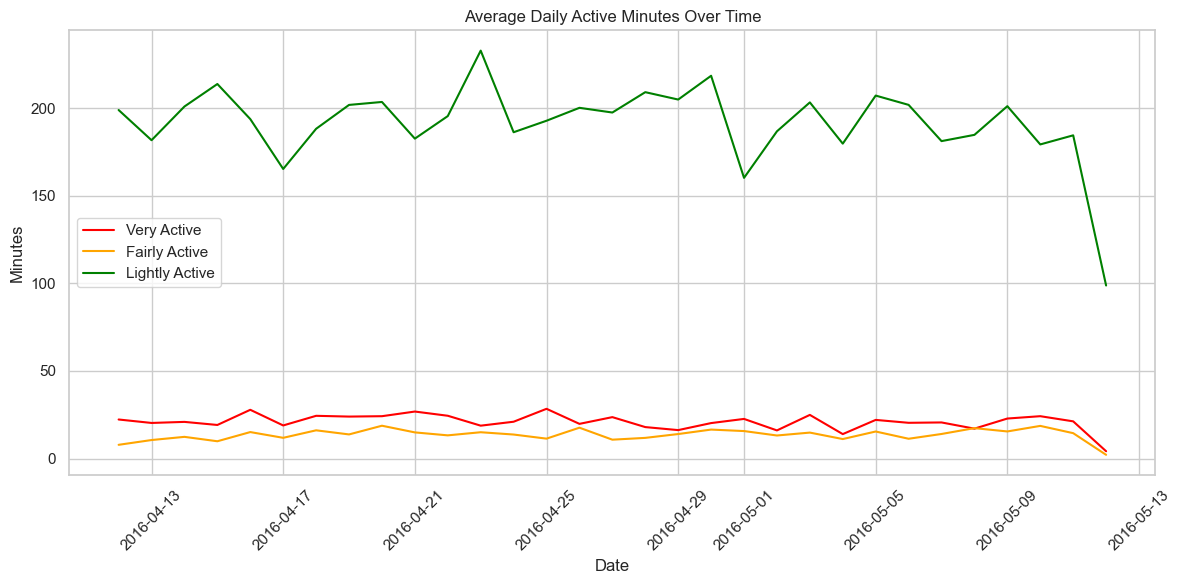

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_summary, x='Date', y='Very_Active_Minutes', label='Very Active', color='red')
sns.lineplot(data=daily_summary, x='Date', y='Fairly_Active_Minutes', label='Fairly Active', color='orange')
sns.lineplot(data=daily_summary, x='Date', y='Lightly_Active_Minutes', label='Lightly Active', color='green')
plt.title('Average Daily Active Minutes Over Time')
plt.ylabel('Minutes')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



This plot clearly illustrates that the majority of the tracked individual's or group's daily activity falls into the "Lightly Active" category, indicating consistent, low-intensity movement. High-intensity activities ("Very Active" and "Fairly Active") make up a much smaller portion of daily active time. The most significant observation is the steep decline in all categories of active minutes, particularly "Lightly Active Minutes," at the very end of the recorded period (around May 10-12), suggesting a considerable reduction in overall physical activity during that time. This trend aligns with the previous observation from the "Average Daily Steps" plot.

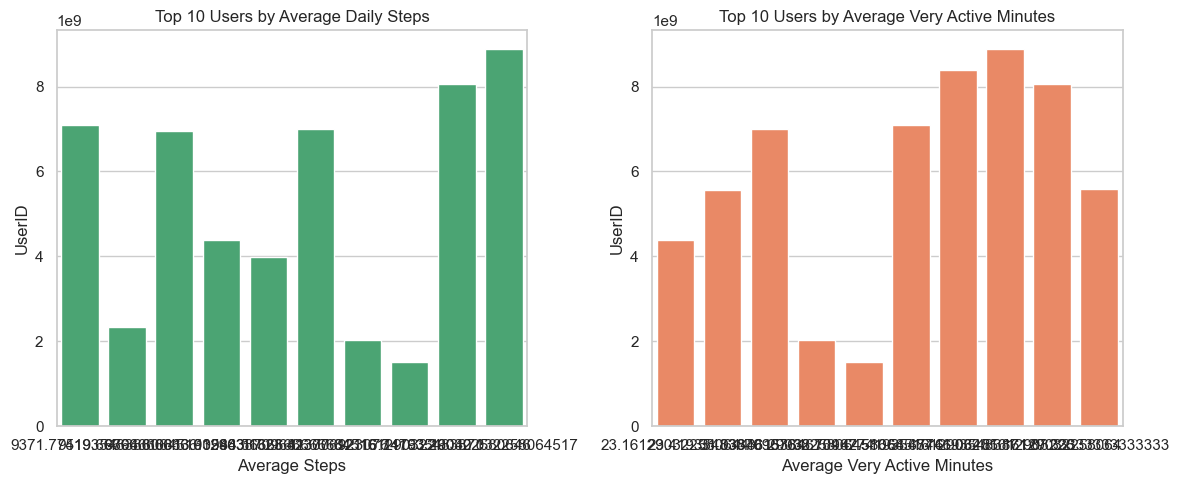

In [26]:
user_activity = df.groupby('UserID').agg({
    'Steps': 'mean',
    'Very_Active_Minutes': 'mean'
}).reset_index()

top_steps_users = user_activity.sort_values(by='Steps', ascending=False).head(10)
top_active_minutes_users = user_activity.sort_values(by='Very_Active_Minutes', ascending=False).head(10)

plt.figure(figsize=(12,5))

# Top users by Steps
plt.subplot(1, 2, 1)
sns.barplot(x='Steps', y='UserID', data=top_steps_users, color='mediumseagreen')
plt.title('Top 10 Users by Average Daily Steps')
plt.xlabel('Average Steps')
plt.ylabel('UserID')

# Top users by Very Active Minutes
plt.subplot(1, 2, 2)
sns.barplot(x='Very_Active_Minutes', y='UserID', data=top_active_minutes_users, color='coral')
plt.title('Top 10 Users by Average Very Active Minutes')
plt.xlabel('Average Very Active Minutes')
plt.ylabel('UserID')

plt.tight_layout()
plt.show()

- There's significant variation in activity levels among users.
- The definition of "top user" depends on the specific metric being measured (steps vs. very active minutes). A user who takes a lot of steps may not necessarily engage in a lot of "very active" minutes, and vice-versa.
- This kind of analysis is useful for identifying high-performing individuals based on different fitness goals or types of activity. For instance, some users might prefer consistent, long-duration moderate activity (more steps), while others might prefer shorter bursts of high-intensity activity (more very active minutes).

                           Steps  Very_Active_Minutes  Fairly_Active_Minutes  \
Steps                   1.000000             0.667079               0.498693   
Very_Active_Minutes     0.667079             1.000000               0.312420   
Fairly_Active_Minutes   0.498693             0.312420               1.000000   
Lightly_Active_Minutes  0.569600             0.051926               0.148820   
Calories_Burned         0.591568             0.615838               0.297623   

                        Lightly_Active_Minutes  Calories_Burned  
Steps                                 0.569600         0.591568  
Very_Active_Minutes                   0.051926         0.615838  
Fairly_Active_Minutes                 0.148820         0.297623  
Lightly_Active_Minutes                1.000000         0.286718  
Calories_Burned                       0.286718         1.000000  


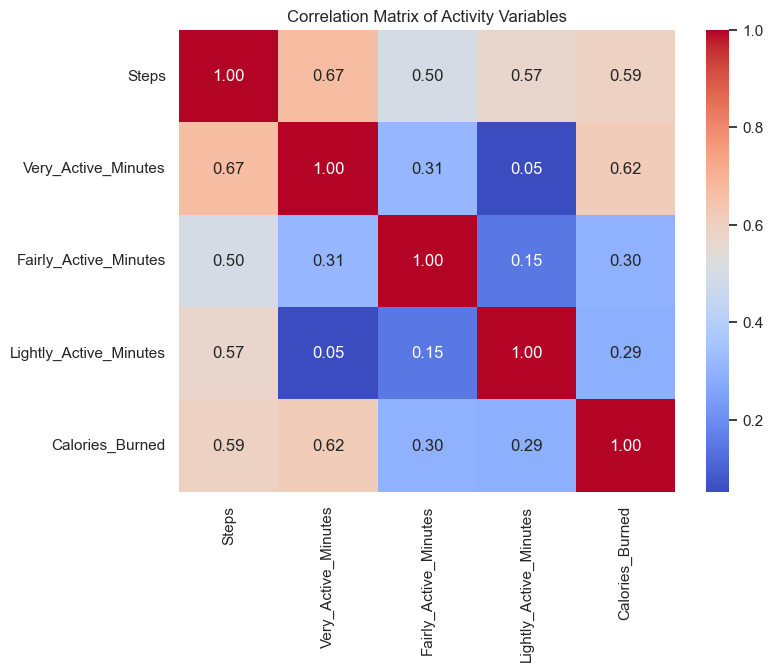

In [27]:
# Select relevant columns
corr_columns = ['Steps', 'Very_Active_Minutes', 'Fairly_Active_Minutes', 'Lightly_Active_Minutes', 'Calories_Burned']

# Calculate correlation matrix
corr_matrix = df[corr_columns].corr()

# Print correlation matrix
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Activity Variables')
plt.show()


Summary of Key Insights:

- Steps are a good overall indicator: "Steps" show a moderate to strong positive correlation with all types of active minutes and "Calories Burned," suggesting it's a good general measure of overall daily movement.
- Intensity matters for Calories: "Very Active Minutes" have the strongest correlation with "Calories Burned," highlighting that higher intensity activity is most effective for calorie expenditure.
- Distinct Activity Types: "Lightly Active Minutes" show very little correlation with "Very Active Minutes" and "Fairly Active Minutes." This suggests that the categories capture different aspects of physical activity and that individuals might engage heavily in one type of activity without necessarily engaging in the others. For example, someone who walks a lot (lightly active) might not do much intense exercise, and vice-versa.
- Fairly Active Minutes' Moderate Role: "Fairly Active Minutes" sit in the middle, having moderate correlations with steps and weak correlations with other activity types and calories burned.

4. Time Series Analysis
- Convert Date column to datetime if not done
- Aggregate data by day/week/month to see overall trends
- Visualize activity over time (line charts)

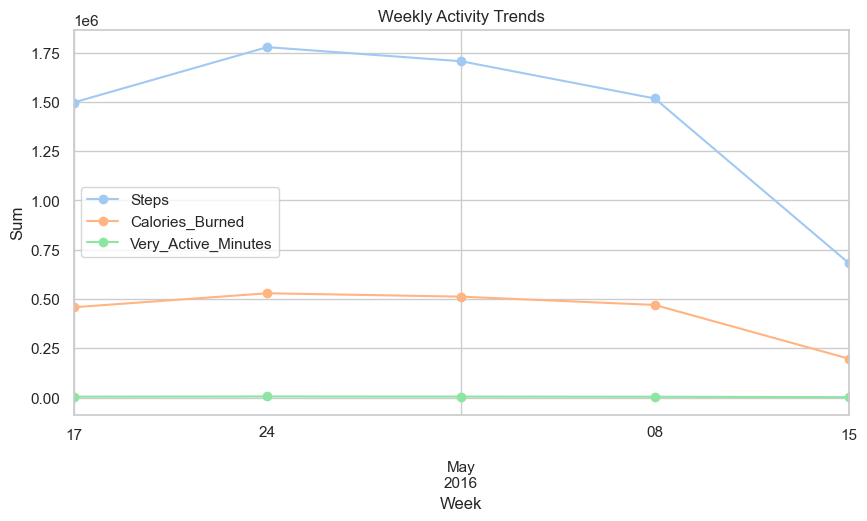

In [28]:
# Ensure Date is datetime (if not done)
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate by week (sum steps, calories, active minutes)
weekly_data = df.resample('W', on='Date').sum()[['Steps', 'Calories_Burned', 'Very_Active_Minutes']]

# Plot trends over time
weekly_data.plot(figsize=(10,5), marker='o')
plt.title('Weekly Activity Trends')
plt.ylabel('Sum')
plt.xlabel('Week')
plt.grid(True)
plt.show()

Overall Summary:

This "Weekly Activity Trends" plot illustrates that while total steps and calories burned were quite high in the earlier weeks of May 2016, there was a noticeable and substantial decline in both these metrics towards the middle of May. "Very Active Minutes," on the other hand, consistently remained at very low levels throughout the entire period. This suggests a decrease in overall physical activity as the month progressed for the individual or group represented by this data. This trend is consistent with the sharp drops observed at the end of the previous "Average Daily Steps" and "Average Daily Active Minutes" plots.

### Key Insights & Recommendations

**Key Insights:**

- Users generally maintain a moderate daily activity level, averaging around 7,500 steps and burning about 2,300 calories per day.
- Very active minutes are low overall, indicating that high-intensity activity is infrequent but can be significant on some days.
- There is a consistent pattern where most activity is lightly active movement rather than intense exercise.
- A sharp decline in activity (steps, active minutes, calories burned) is observed toward the end of the data period, which could be due to external factors or device issues.
- Activity levels vary significantly among users; some prefer consistent moderate activity, while others have bursts of intense activity.

**Recommendations:**

- Encourage users to increase their “Very Active Minutes” gradually to improve cardiovascular health.
- Set personalized step goals based on historical activity levels to motivate users.
- Investigate the causes of sudden drops in activity (e.g., health, device errors) for better data reliability.
- Promote balanced activity routines combining light, moderate, and vigorous activity.
- Use clustering of users to tailor health and fitness plans specific to different activity patterns.